Logistic regression

In [1]:
# importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
import dtale

In [4]:
data_show = dtale.show(df)

In [5]:
data_show.open_browser()

Dealing with outlyers

In [6]:
# Step 1: Calculate the first and third quartile
Q1 = df['person_age'].quantile(0.25, interpolation='nearest')
Q2=df['person_age'].quantile(0.5,interpolation='nearest')
Q3= df['person_age'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['person_age'] < lower_bound) | (df['person_age'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['person_age'] = df['person_age'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound 15.0 39.0
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
81          144.0          male         Bachelor       300616.0   
183         144.0          male        Associate       241424.0   
575         123.0        female      High School        97140.0   
747         123.0          male         Bachelor        94723.0   
29120        40.0        female         Bachelor      1440915.0   
...           ...           ...              ...            ...   
44916        42.0        female      High School       100310.0   
44923        47.0          male        Associate        46637.0   
44947        42.0          male        Doctorate       705960.0   
44972        43.0          male        Associate       184295.0   
44977        43.0          male        Associate        22639.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
81                125   

In [7]:
# Step 1: Calculate the first and third quartile
Q1 = df['person_income'].quantile(0.25, interpolation='nearest')
Q2=df['person_income'].quantile(0.5,interpolation='nearest')
Q3= df['person_income'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['person_income'] < lower_bound) | (df['person_income'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['person_income'] = df['person_income'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -25668.5 168663.5
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
15           23.0        female           Master       600891.0   
20           25.0          male         Bachelor       195718.0   
33           25.0        female      High School       368115.0   
34           26.0        female        Associate       361076.0   
42           26.0          male         Bachelor       361293.0   
...           ...           ...              ...            ...   
44831        25.0        female      High School       192090.0   
44836        26.0          male        Doctorate       293525.0   
44922        29.0          male           Master       726416.0   
44947        26.0          male        Doctorate       705960.0   
44972        26.0          male        Associate       184295.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
15       

In [8]:
# Step 1: Calculate the first and third quartile
Q1 = df['person_emp_exp'].quantile(0.25, interpolation='nearest')
Q2=df['person_emp_exp'].quantile(0.5,interpolation='nearest')
Q3= df['person_emp_exp'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['person_emp_exp'] < lower_bound) | (df['person_emp_exp'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['person_emp_exp'] = df['person_emp_exp'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -9.5 18.5
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
81           26.0          male         Bachelor        67048.0   
183          26.0          male        Associate        67048.0   
575          26.0        female      High School        97140.0   
747          26.0          male         Bachelor        94723.0   
29120        26.0        female         Bachelor        67048.0   
...           ...           ...              ...            ...   
44916        26.0        female      High School       100310.0   
44923        26.0          male        Associate        46637.0   
44947        26.0          male        Doctorate        67048.0   
44972        26.0          male        Associate        67048.0   
44977        26.0          male        Associate        22639.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
81                125   

In [9]:
# Step 1: Calculate the first and third quartile
Q1 = df['loan_amnt'].quantile(0.25, interpolation='nearest')
Q2=df['loan_amnt'].quantile(0.5,interpolation='nearest')
Q3= df['loan_amnt'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['loan_amnt'] < lower_bound) | (df['loan_amnt'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -5855.5 23092.5
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
6            26.0        female         Bachelor        93471.0   
7            24.0        female      High School        95550.0   
...           ...           ...              ...            ...   
44922        29.0          male           Master        67048.0   
44944        26.0          male        Associate        97590.0   
44952        23.0        female        Associate        72843.0   
44970        26.0        female         Bachelor        84780.0   
44972        26.0          male        Associate        67048.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0          

In [10]:
# Step 1: Calculate the first and third quartile
Q1 = df['loan_int_rate'].quantile(0.25, interpolation='nearest')
Q2=df['loan_int_rate'].quantile(0.5,interpolation='nearest')
Q3= df['loan_int_rate'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['loan_int_rate'] < lower_bound) | (df['loan_int_rate'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['loan_int_rate'] = df['loan_int_rate'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound 1.9899999999999993 19.59
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
17           23.0        female      High School       111369.0   
112          25.0        female         Bachelor        67048.0   
349          25.0          male        Associate        67048.0   
420          23.0          male      High School        71875.0   
440          22.0          male         Bachelor       100479.0   
...           ...           ...              ...            ...   
44762        34.0          male           Master        71692.0   
44850        31.0        female      High School        92212.0   
44920        26.0        female        Associate        53574.0   
44965        31.0          male        Associate       100407.0   
44972        26.0          male        Associate        67048.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
17

In [11]:
# Step 1: Calculate the first and third quartile
Q1 = df['loan_percent_income'].quantile(0.25, interpolation='nearest')
Q2=df['loan_percent_income'].quantile(0.5,interpolation='nearest')
Q3= df['loan_percent_income'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['loan_percent_income'] < lower_bound) | (df['loan_percent_income'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['loan_percent_income'] = df['loan_percent_income'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -0.10999999999999999 0.37
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
22           22.0        female           Master        79255.0   
...           ...           ...              ...            ...   
44940        29.0          male      High School        30046.0   
44942        27.0          male           Master        48432.0   
44966        26.0        female         Bachelor        36844.0   
44986        34.0          male         Bachelor        41876.0   
44994        24.0        female        Associate        31924.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0

In [12]:
# Step 1: Calculate the first and third quartile
Q1 = df['cb_person_cred_hist_length'].quantile(0.25, interpolation='nearest')
Q2=df['cb_person_cred_hist_length'].quantile(0.5,interpolation='nearest')
Q3= df['cb_person_cred_hist_length'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['cb_person_cred_hist_length'] < lower_bound) | (df['cb_person_cred_hist_length'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -4.5 15.5
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
29120        26.0        female         Bachelor        67048.0   
29125        37.0          male         Bachelor        97166.0   
29127        26.0          male      High School        67048.0   
29130        37.0        female        Associate       103064.0   
29133        26.0          male        Associate        67048.0   
...           ...           ...              ...            ...   
44627        26.0          male        Doctorate        70131.0   
44705        26.0        female         Bachelor        59758.0   
44734        39.0          male           Master        67306.0   
44923        26.0          male        Associate        46637.0   
44947        26.0          male        Doctorate        67048.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
29120            

In [13]:
# Step 1: Calculate the first and third quartile
Q1 = df['credit_score'].quantile(0.25, interpolation='nearest')
Q2=df['credit_score'].quantile(0.5,interpolation='nearest')
Q3= df['credit_score'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['credit_score'] = df['credit_score'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound 497.5 773.5
Here are the outliers based on the IQR threshold:
        person_age person_gender person_education  person_income  \
81           26.0          male         Bachelor        67048.0   
172          25.0          male      High School        75504.0   
183          26.0          male        Associate        67048.0   
353          23.0        female      High School        19859.0   
575          26.0        female      High School        97140.0   
...           ...           ...              ...            ...   
44618        28.0        female         Bachelor        59767.0   
44676        24.0        female        Associate        37217.0   
44754        25.0          male      High School        86195.0   
44954        25.0        female      High School        19819.0   
44992        23.0        female         Bachelor        40925.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
81             

In [15]:
data_show.kill()

2025-01-25 11:05:55,325 - INFO     - Executing shutdown...
2025-01-25 11:05:55,347 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [16]:
# X and y column
X = df['person_income']
y = df['loan_status']

In [17]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_test = X_test.to_frame()
X_train = X_train.to_frame()
y_test = y_test.to_frame()
y_train = y_train.to_frame()

In [19]:
# model call
model = LogisticRegression()

In [20]:
# train the model
model.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [21]:
# predict the values
y_pred = model.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9000,))

In [23]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.7781111111111111
Recall Score:  0.007960199004975124
Precision Score:  0.8421052631578947
F1 Score:  0.015771315919172007
Confusion Matrix: 
 [[6987    3]
 [1994   16]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      6990
           1       0.84      0.01      0.02      2010

    accuracy                           0.78      9000
   macro avg       0.81      0.50      0.45      9000
weighted avg       0.79      0.78      0.68      9000



Text(70.72222222222221, 0.5, 'Actual')

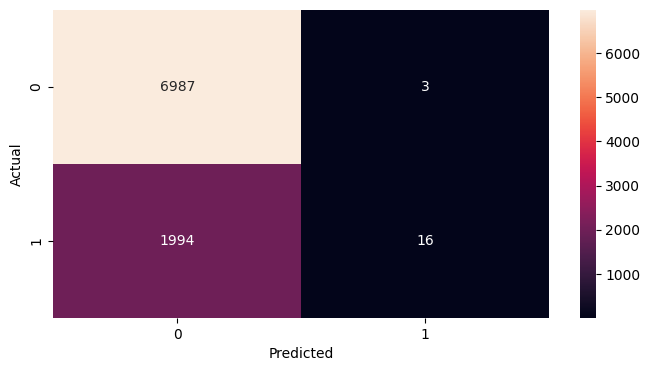

In [24]:
# plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')